In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%matplotlib inline
from src.data_processing.feature import Feature
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_hdf('../../data/original/train_processed_e1.h5', key='table')

In [4]:
cols = df.columns

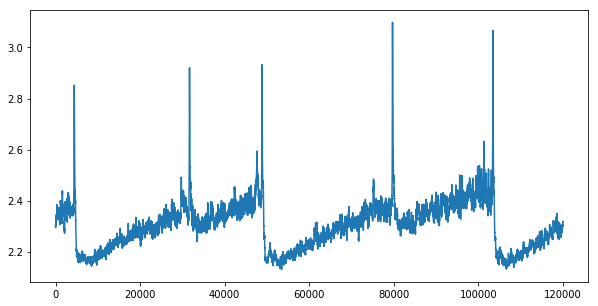

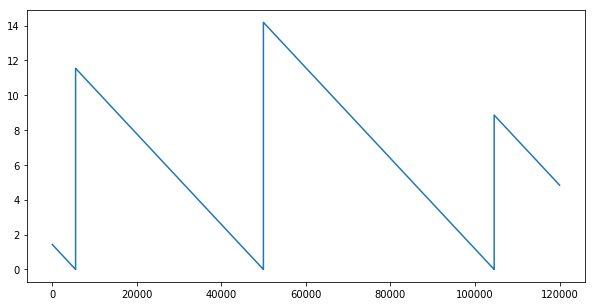

In [14]:
num_samples = int(1.2e5)
signal = df[cols[0]].iloc[:num_samples]
ttf = df[cols[-1]].iloc[:num_samples]

plt.figure(figsize=(10,5))
plt.plot(signal)
plt.title(cols[0])

plt.figure(figsize=(10,5))
plt.plot(ttf)
plt.title('ttf')
plt.show()

## Clip

2.5326705273443104


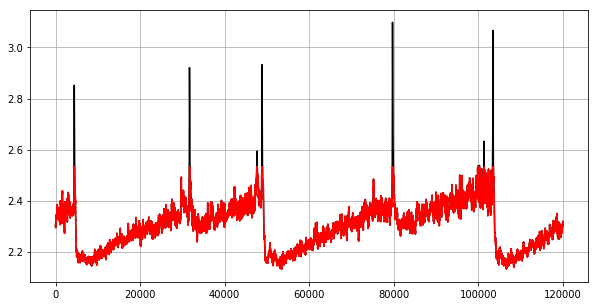

In [22]:
thresh = np.quantile(signal, q=0.99)
print(thresh)
signal_clipped = np.clip(signal, a_min=0, a_max=thresh)

plt.figure(figsize=(10,5))
plt.plot(signal, 'k')
plt.plot(signal_clipped, 'r')
plt.grid()

## Normalize

(120000,)
(120000,)


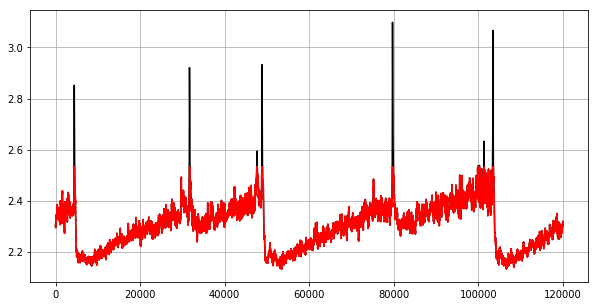

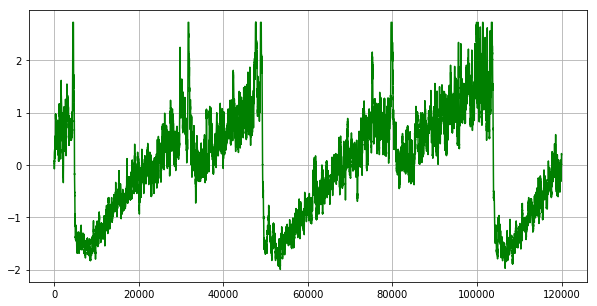

In [50]:
scaler = StandardScaler()
print(signal_clipped.values.flatten().shape)
scaler.fit(signal_clipped.values.astype('float').reshape(-1,1))

signal_clip_normed = scaler.transform(signal_clipped.values.astype('float').reshape(-1,1)).squeeze()

plt.figure(figsize=(10,5))
plt.plot(signal, 'k')
plt.plot(signal_clipped, 'r')
plt.title('clipped')
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(signal_clip_normed, 'g')
plt.title('normed')
plt.grid()

## Filter

In [57]:
 signal_clip_normed_smooth = savgol_filter(signal_clip_normed, window_length=10001, polyorder=2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


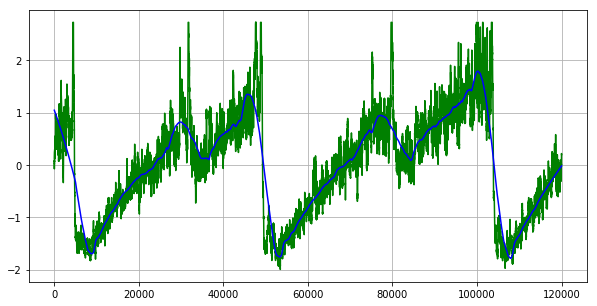

In [58]:
plt.figure(figsize=(10,5))
plt.plot(signal_clip_normed, 'g')
plt.plot(signal_clip_normed_smooth, 'b')
plt.title('filtered')
plt.grid()

## Compute rse and std

In [61]:
signal_std = signal_clip_normed.std()
print(signal_std)

1.0


In [62]:
rmse = np.linalg.norm(signal_clip_normed - signal_clip_normed_smooth) / num_samples
print(rmse)

0.0012821313586337069


## Tests

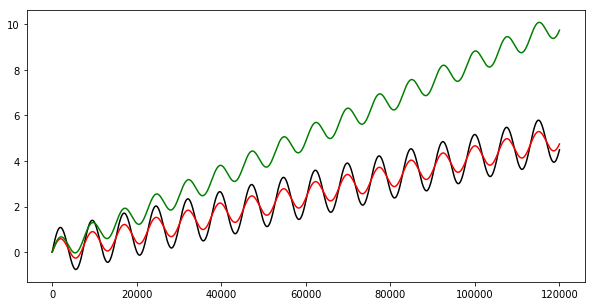

In [74]:
sin_sig_0 = np.sin(np.linspace(0, 100., num_samples)) + np.linspace(0,5, num_samples)
sin_sig_1 = 0.5 * np.sin(np.linspace(0, 100., num_samples)) + np.linspace(0,5, num_samples)
sin_sig_2 = 0.5 * np.sin(np.linspace(0, 100., num_samples)) + np.linspace(0,10, num_samples)

plt.figure(figsize=(10,5))
plt.plot(sin_sig_0, 'k')
plt.plot(sin_sig_1, 'r')
plt.plot(sin_sig_2, 'g')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


0.0007301287356895666


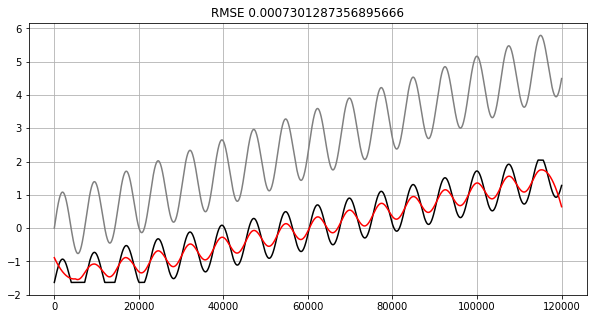

0.0003919330099446247


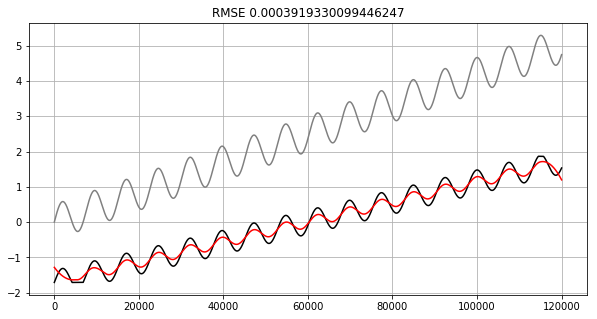

0.00020158230550631565


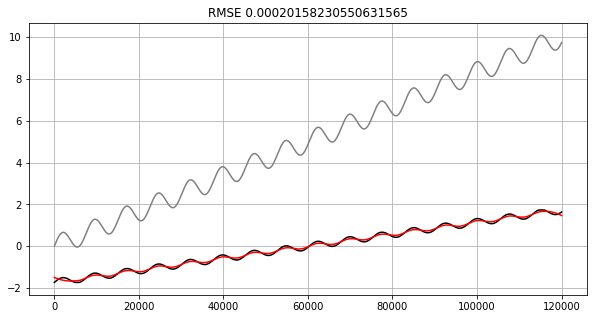

In [79]:
for sig in (sin_sig_0, sin_sig_1, sin_sig_2):
    thresh = np.quantile(sig, q=0.99)
    signal_clipped = np.clip(sig, a_min=0, a_max=thresh)
    scaler = StandardScaler()
    scaler.fit(signal_clipped.astype('float').reshape(-1,1))
    signal_clip_normed = scaler.transform(signal_clipped.astype('float').reshape(-1,1)).squeeze()
    signal_clip_normed_smooth = savgol_filter(signal_clip_normed, window_length=10001, polyorder=2)
    rmse = np.linalg.norm(signal_clip_normed - signal_clip_normed_smooth) / num_samples
    
    print(rmse)
    plt.figure(figsize=(10,5))
    plt.plot(sig, 'gray')
    plt.plot(signal_clip_normed, 'k')
    plt.plot(signal_clip_normed_smooth, 'r')
    plt.grid()
    plt.title("RMSE " + str(rmse) )
    
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


0.00010932579898080522


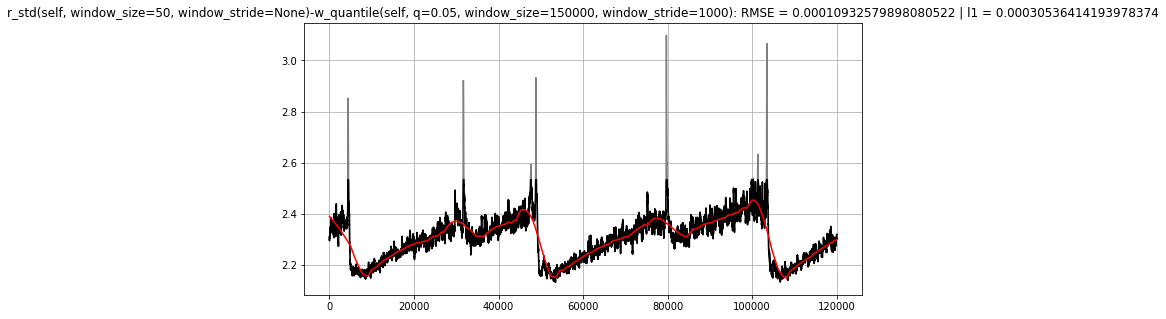

0.00010553588111159846


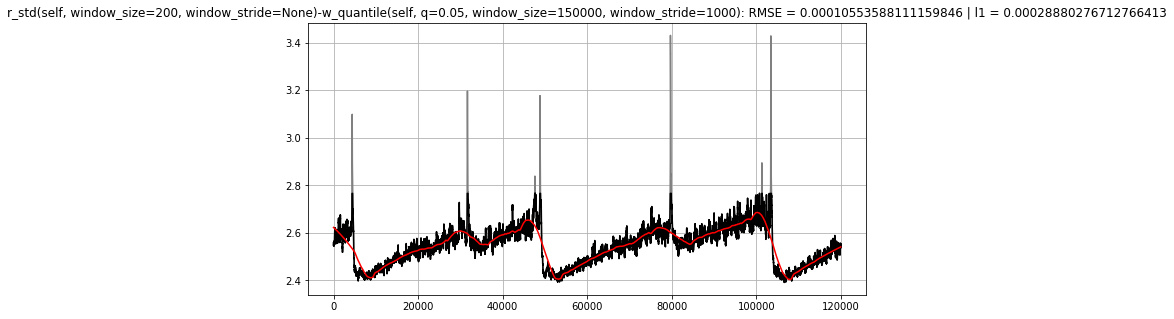

0.00012590837556739298


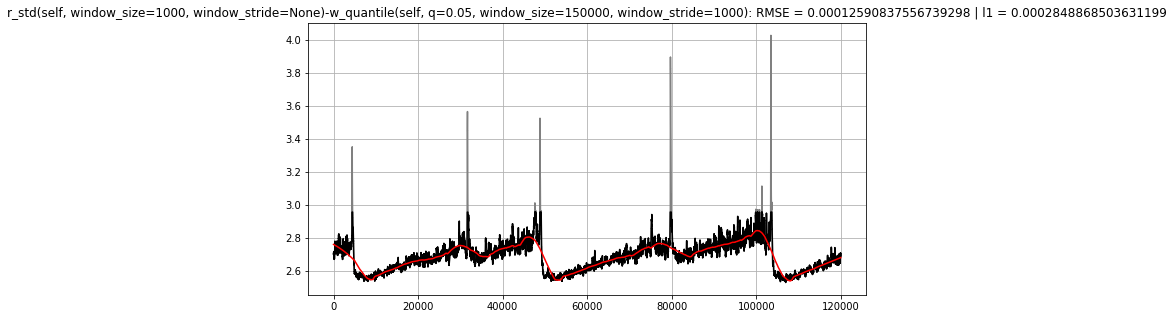

0.00070717889282778


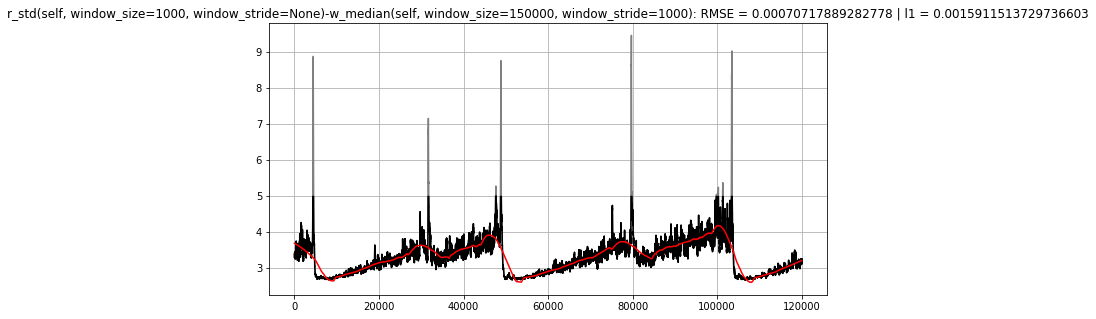

0.007294338408790775


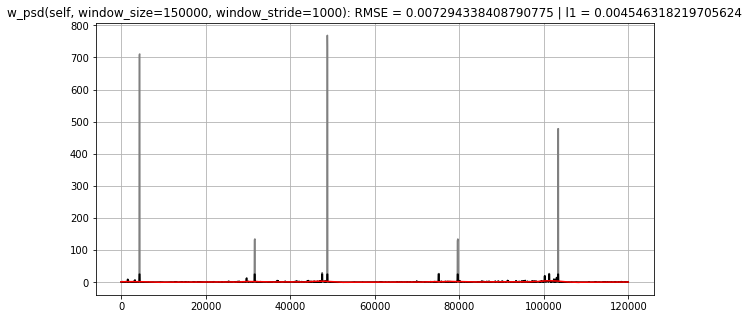

0.0034514676341418932


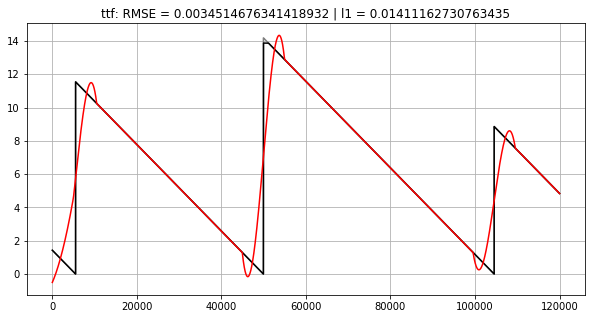

In [86]:
for col in df.columns:
    sig = df[col].iloc[:num_samples]
    thresh = np.quantile(sig, q=0.99)
    signal_clipped = np.clip(sig, a_min=0, a_max=thresh)
    scaler = StandardScaler()
    scaler.fit(signal_clipped.values.astype('float').reshape(-1,1))
    signal_clip_normed = scaler.transform(signal_clipped.values.astype('float').reshape(-1,1)).squeeze()    
    signal_clip_normed = signal_clipped


    signal_clip_normed_smooth = savgol_filter(signal_clip_normed, window_length=10001, polyorder=2)
    rmse = np.linalg.norm(signal_clip_normed - signal_clip_normed_smooth) / num_samples
    l1 = np.abs(np.sum(signal_clip_normed - signal_clip_normed_smooth)) / num_samples
    
    print(rmse)
    plt.figure(figsize=(10,5))
    plt.plot(sig, 'gray')
    plt.plot(signal_clip_normed, 'k')
    plt.plot(signal_clip_normed_smooth, 'r')
    plt.grid()
    plt.title(col + ": RMSE = " +str(rmse) + ' | l1 = ' + str(l1))
    
    plt.show()